<a href="https://colab.research.google.com/github/nalyzhang/MO/blob/main/lab1_2373_Panina_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nalyzhang","key":"ba24fba2eeab9f621e8d2840dd5e8f3d"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                            Student Performance Factors                          94KB  2024-09-02 10:53:57          13651        283  1.0              
owm4096/laptop-prices                                              Laptop Prices                                        25KB  2024-09-09 12:43:01           3681         68  1.0              
muhammadehsan02/global-football-results-18722024                   Global Football Results: (1872–2024)                  1MB  2024-09-04 10:00:52           1265         27  1.0              
nyagami/ea-sports-fc-25-database-ratings-and-

In [3]:
! kaggle datasets download -d nguyentiennhan/stock-prices-of-the-10-largest-fast-food-companies

Dataset URL: https://www.kaggle.com/datasets/nguyentiennhan/stock-prices-of-the-10-largest-fast-food-companies
License(s): CC0-1.0
  0% 0.00/1.45M [00:00<?, ?B/s]
100% 1.45M/1.45M [00:00<00:00, 130MB/s]


In [5]:
! unzip "stock-prices-of-the-10-largest-fast-food-companies.zip"

Archive:  stock-prices-of-the-10-largest-fast-food-companies.zip
  inflating: BRK-A.csv               
  inflating: DNUT.csv                
  inflating: DPZ.csv                 
  inflating: LKNCY.csv               
  inflating: MCD.csv                 
  inflating: PZZA.csv                
  inflating: QSR.csv                 
  inflating: SBUX.csv                
  inflating: WEN.csv                 
  inflating: YUM.csv                 


**Описание датасета:** набор данных состоит из исторических данных о стоимости акций 10 крупнейших компаний быстрого питания. Данные об акциях каждой компании хранятся в отдельном файле Excel, содержащем ключевые финансовые показатели, которые обычно отслеживаются для анализа рынка, такие как открытие, максимум, минимум, закрытие, скорректированные цены закрытия и объем торгов за определенный период времени.

Далее будет использоваться и описываться файл *SBUX.csv*, описывающий акции компании быстрого питания *Starbuks Corporation*.

**Источник данных:** датасет представлен на открытой платформе *Kaggle*. Данные были собраны из *Yahoo Finance*.

**Характер данных:** реальные.

**Атрибуты датасета:**

*Date:* Дата публикации. Тип данных - DataTime.

*Open:* Цена, по которой акция открылась в данный день. Тип данных - число.

*High:* Самая высокая цена акции за время торговой сессии. Тип данных - число.

*Low:* Самая низкая цена акции за время торговой сессии. Тип данных - число.

*Close:* Цена акции на момент закрытия рынка. Тип данных - число.

*Adi Close:* Цена закрытия, скорректированная с учетом дивидендов и разделения акций. Тип данных - число.

*Volume:* количество акций, проданных в течение дня. Тип данных - число.

**Анализ** регрессионный

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

<ipython-input-1-7576e4074858>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [7]:
df = pd.read_csv("SBUX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.259137,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.277216,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.268176,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.274203,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.274203,13996800


In [9]:
df.describe()

# с помощью данной функции смотрим на строчку std,
# где показан ско значений

,Open,High,Low,Close,Adj Close,Volume
count,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8.117000e+03
mean,30.583618,30.887982,30.274038,30.588554,27.075550,1.469782e+07
std,33.871029,34.168445,33.564762,33.872286,31.886847,1.344132e+07
min,0.328125,0.347656,0.320313,0.335938,0.259137,1.504000e+06
25%,4.460938,4.575000,4.362500,4.467500,3.446157,7.842100e+06
50%,13.535000,13.705000,13.370000,13.560000,10.471535,1.167200e+07
75%,55.820000,56.290001,55.380001,55.810001,47.608185,1.774560e+07
max,126.080002,126.320000,124.809998,126.059998,117.301453,5.855088e+08


In [13]:
num_list = [x for x in df.columns if x != "Date"]
print(num_list)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


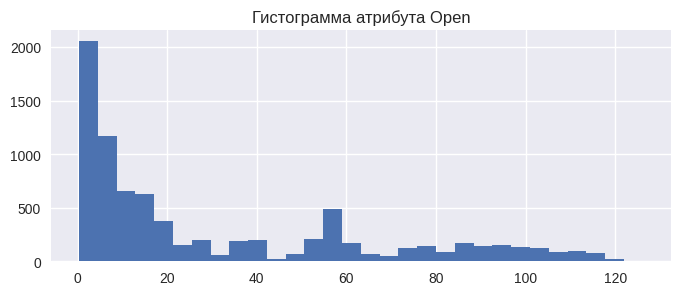

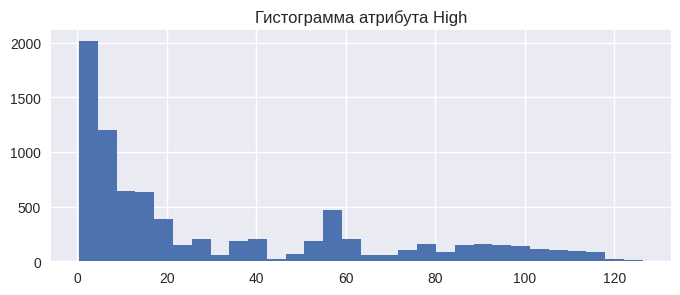

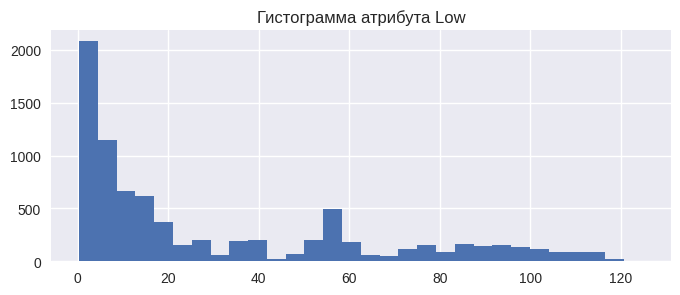

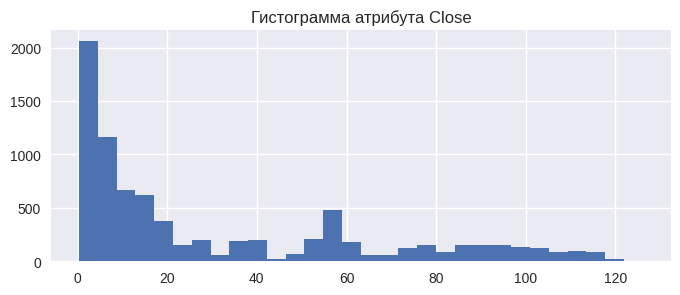

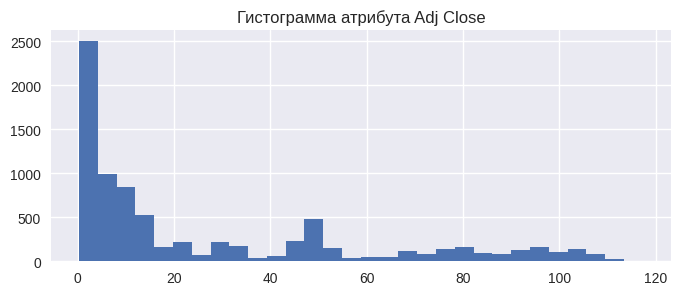

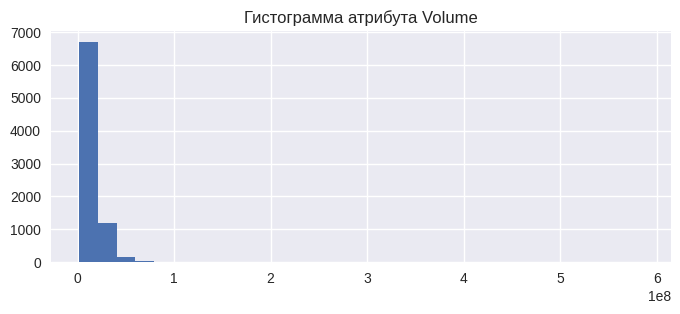

In [33]:
for attribute in num_list:
  plt.figure(figsize=(8,3))
  plt.hist(df[attribute],bins=30)
  plt.grid(True)
  plt.title(f'Гистограмма атрибута {attribute}')

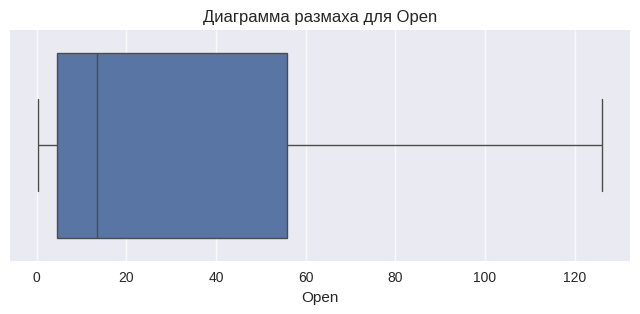

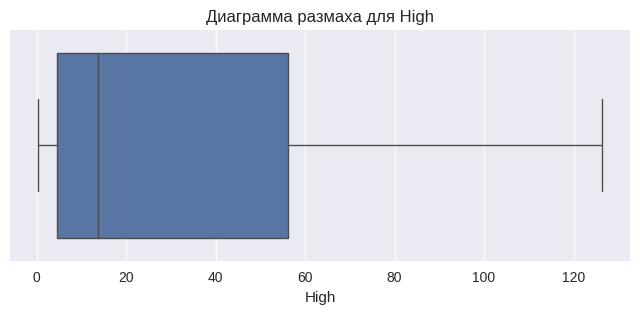

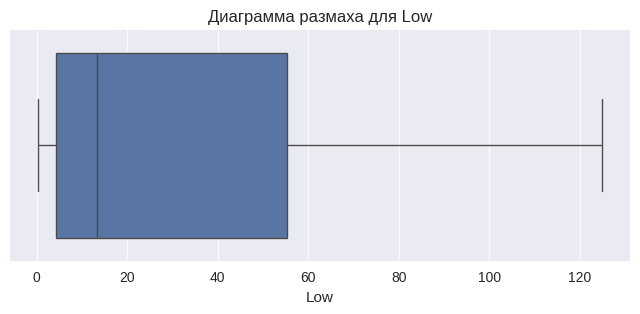

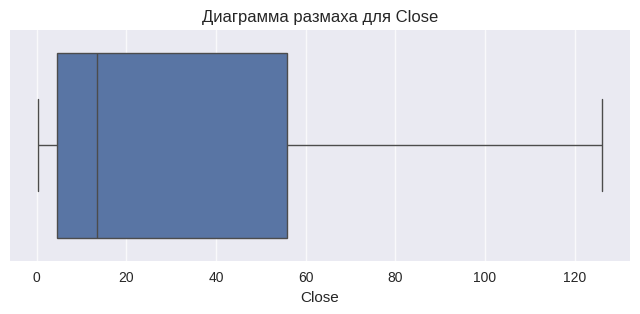

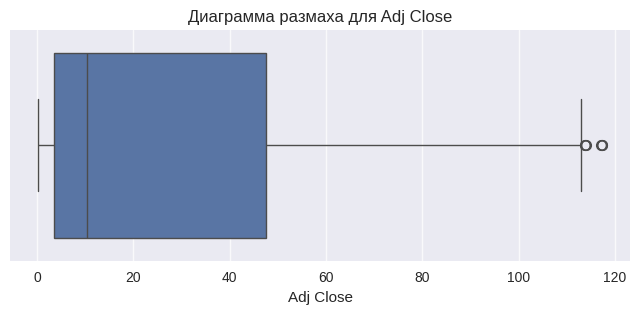

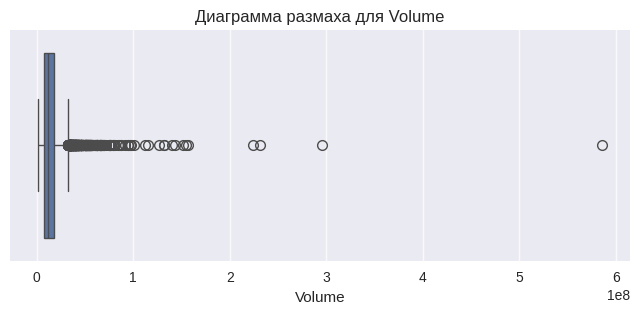

In [34]:
for attribute in num_list:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[attribute])
    plt.title(f'Диаграмма размаха для {attribute}')
    plt.xlabel(attribute)
    plt.grid(axis='x', alpha=0.75)
    plt.show()

Несколько выбросов есть в атрибуте Adj Close. В атрибуте Volume выбросов много.

В построении и исследовании гистограммы для атрибута Date не имеет смысла, так как даты не повторяются.

In [23]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


Пропущеных значений нет

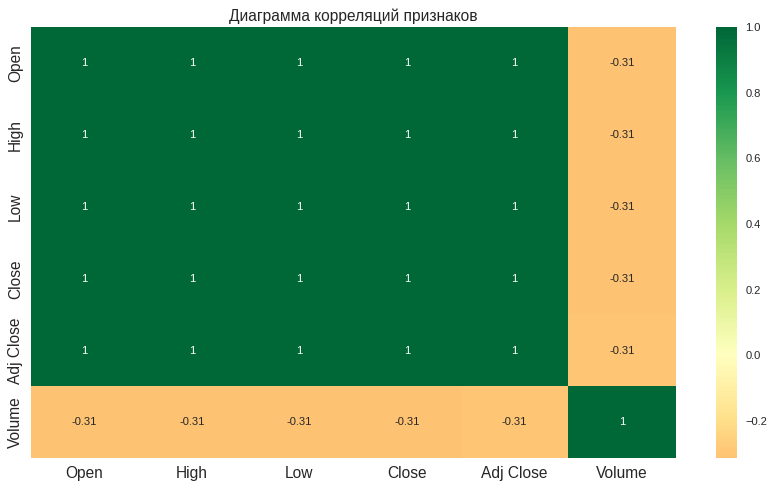

In [28]:
plt.figure(figsize=(13,7), dpi=80)
sns.heatmap(df[num_list].corr(), xticklabels=df[num_list].corr().columns, yticklabels=df[num_list].corr().columns, center=0, annot=True, cmap='RdYlGn',)

plt.title('Диаграмма корреляций признаков', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

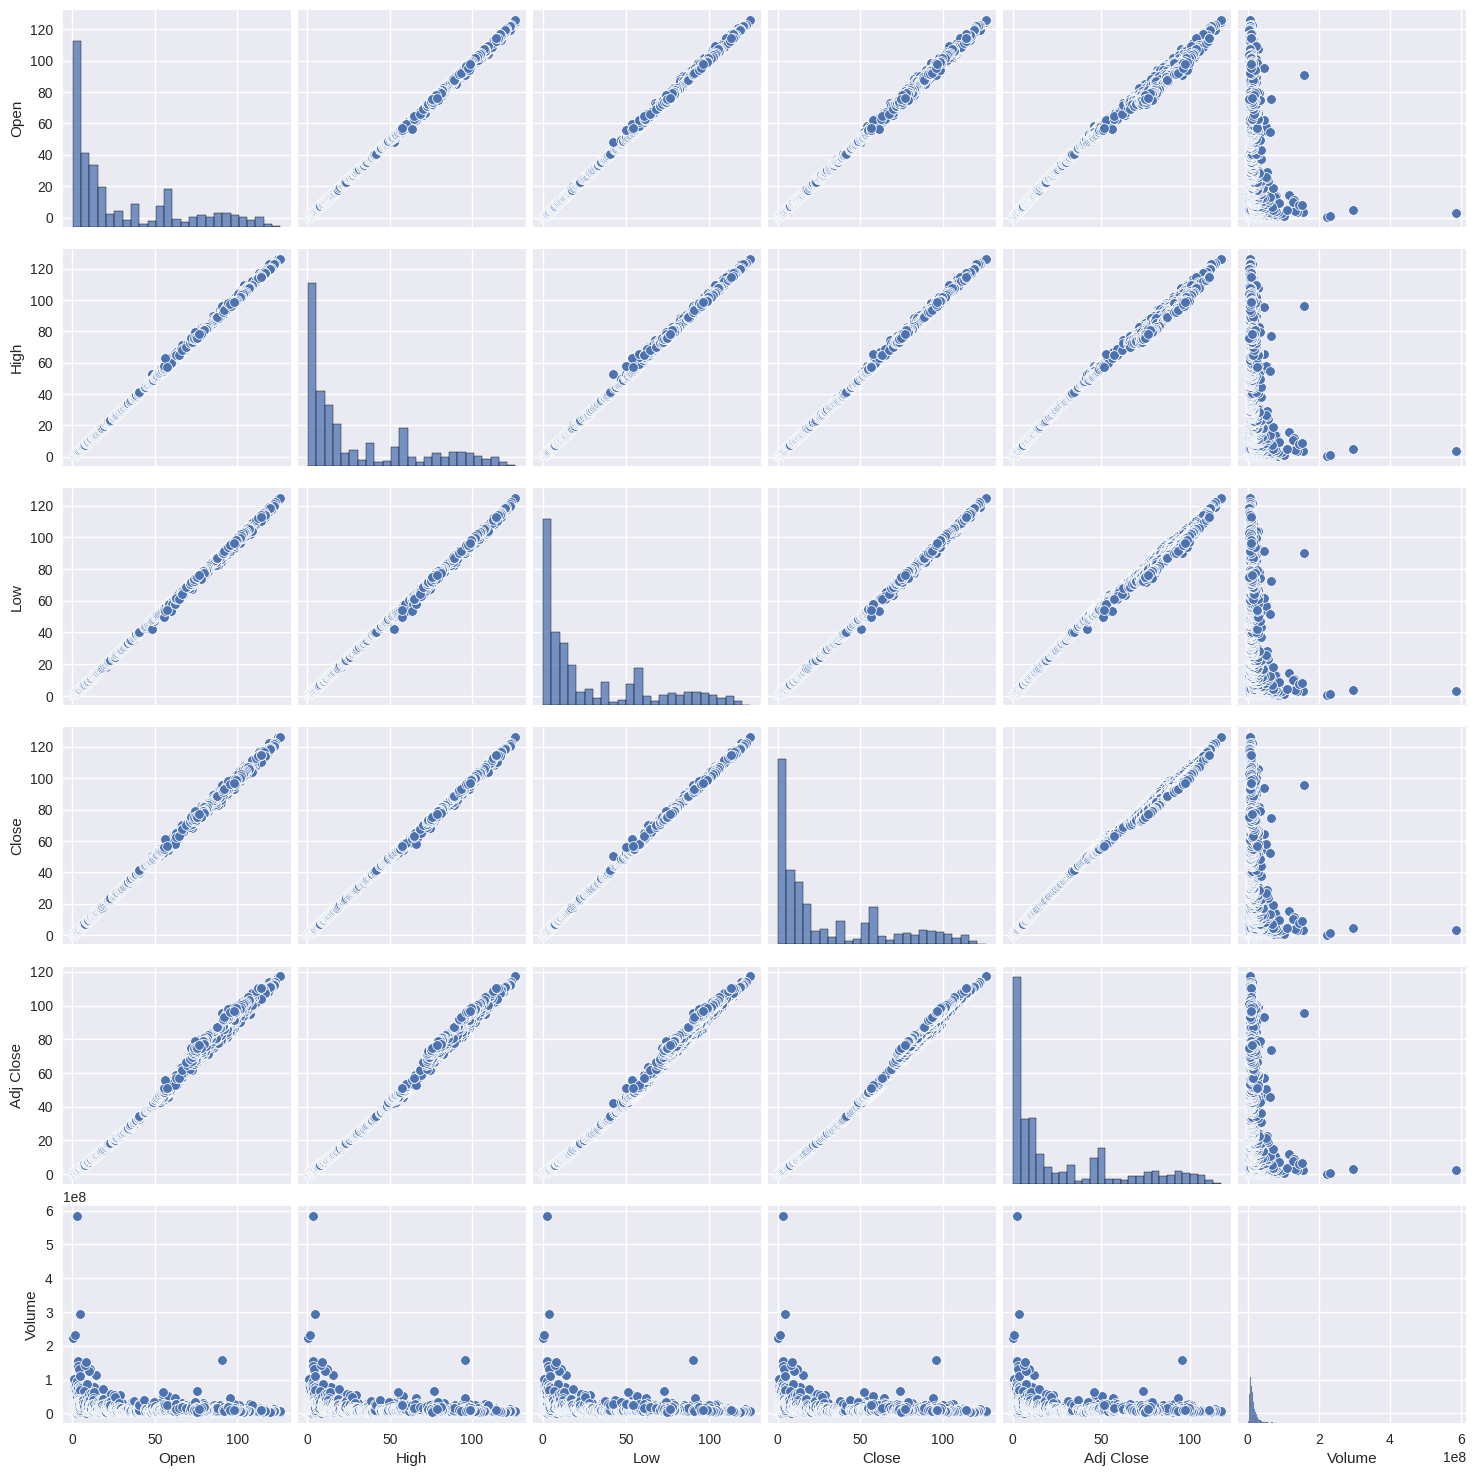

In [29]:
sns.pairplot(df[num_list])
plt.show()

Самая сильная корреляция (положительная) попарно между Open, High, Low, Close, Adj Close, а также между Volume и Volume. Наиболее слабая корреляция (отрицательная) наблюдается между Volume и остальными атрибутами.